<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week6/Day4/Exercises_XP/SciPy%20and%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, spearmanr, pearsonr
from scipy import stats

# 🌟 Exercise 1 : Linear Regression Analysis

Objective: Apply linear regression to a dataset and interpret the results.

Task: Given a dataset of housing prices (house_prices) and their corresponding sizes (house_sizes), use linear regression to predict the price of a house given its size.




1.   What is the slope and intercept of the regression line?
2.   Predict the price of a house that is 90 square meters.
3. Interpret the meaning of the slope in the context of housing prices.



In [ ]:
data = {
    'house_sizes': ['50', '70', '80', '100', '120'],
    'house_prices': ['150000', '200000', '210000', '250000', '280000']
        }

df = pd.DataFrame(data)
df['house_sizes'] = pd.to_numeric(df['house_sizes'])
df['house_prices']= pd.to_numeric(df['house_prices'])
x = df['house_sizes']
y = df['house_prices']
df.info()

In [16]:
# Performing linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

m_x = x.mean()
m_y = y.mean()

n = 5

# calculating cross-deviation and deviation about x
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x

# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x

# The slope and intercept of the regression line
print("mean_size:", m_x)
print("mean_prize:", m_y)
print("Slope:", slope)
print("Intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)



mean_size: 84.0
mean_prize: 218000.0
Slope: 1828.7671232876712
Intercept: 64383.56164383562
r_value: 0.9941945063380758
p_value: 0.0005305349938203051
std_err: 114.26934937207407


A positive slope for this compare means that as bigger the house is the price will increase.

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=x, y=y, marker='x')
plt.xlabel('House size')
plt.ylabel('House prize')
plt.title('Regresion line - House size vs price')

For a 90 sq mts house the price would be: $ 228972.603


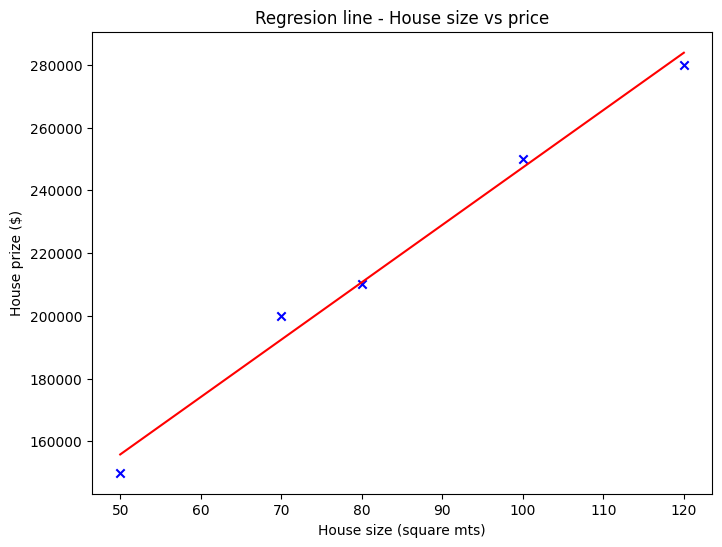

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue',marker='x')

# predicted response vector
y_pred = b_0 + b_1*x

# plotting the regression line
plt.plot(x, y_pred, color = "r")

# putting labels
plt.xlabel('House size (square mts)')
plt.ylabel('House prize ($)')
plt.title('Regresion line - House size vs price')

print(f"For a 90 sq mts house the price would be: $ {round((b_0 + b_1*90),3)}")

# 🌟 Exercise 2 : Understanding ANOVA

Test understanding of ANOVA and its application.

Task: Three different fertilizers are applied to three separate groups of plants to test their effectiveness. The growth in centimeters is recorded.

1. Perform an ANOVA test on the given data. What are the F-value and P-value?
2. Based on the P-value, do the fertilizers have significantly different effects on plant growth?
3. Explain what would happen if the P-value were greater than 0.05.

In [25]:
fertilizer_1 = [5, 6, 7, 6, 5]
fertilizer_2 = [7, 8, 7, 9, 8]
fertilizer_3 = [4, 5, 4, 3, 4]

f_value, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)
print("F-value:", f_value)
print("P-value:", p_value)

F-value: 28.52631578947368
P-value: 2.7542672098048448e-05


As we can see that the p value is low (lower than 0.05) and there's a difference regarding the f value then we can say that there's an effect on plants among the different fertilizer.
If the P value were grater than 0.05 means that there's less correlation between the results and the study, meaning that the probability that we can have the same result are less likely.

# 🌟 Exercise 3 : Probability Distributions

Work with a binomial distribution: calculate probabilities for different numbers of successes.



In [40]:
#  Calculating the probability of getting exactly 5 heads in 10 coin flips.
n = 10
p = 0.5

# defining the list of r values
r_values = list(range(n + 1))

# obtaining the mean and variance
mean, var = binom.stats(n, p)
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))

r	p(r)
0	0.0009765624999999989
1	0.009765625000000002
2	0.04394531250000004
3	0.1171875
4	0.2050781249999999
5	0.24609375000000003
6	0.2050781249999999
7	0.11718749999999999
8	0.04394531250000004
9	0.009765625000000002
10	0.0009765625
mean = 5.0
variance = 2.5


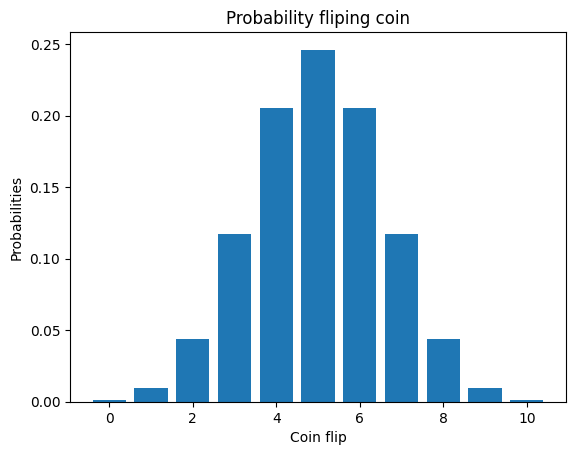

In [42]:
plt.bar(r_values, dist)
plt.xlabel('Coin flip')
plt.ylabel('Probabilities')
plt.title('Probability fliping coin')
plt.show()

# 🌟 Exercise 4 : Correlation Coefficients

Calculate the Pearson and Spearman correlation coefficients between two variables in a dataset.

In [48]:
N = 20
Age = np.random.randint(18,66, size = N)
Income = np.random.normal(3500,1500,N)

# Calculate Pearson Correlation between Monthly Income and Online Purchase Frequency
corr, _ = pearsonr(Age, Income)
print(f'Pearson Correlation Coefficient: {corr:.2f}')

# Calculate Spearman Rank Correlation between Age and Hours Spent on Social Media\n",
corr, _ = spearmanr(Age, Income)
print(f'Spearman Rank Correlation: {corr:.2f}')

Pearson Correlation Coefficient: -0.14
Spearman Rank Correlation: -0.18


# 🌟 Exercise 5 : Linear Relationships
Create a scatter plot of two variables (age and income) and visually assess the linear relationship.

In [51]:
data = pd.DataFrame({'age': [23, 25, 30, 35, 40], 'income': [35000, 40000, 50000, 60000, 70000]})

n = 5
x = data['age']
y = data['income']
age_m = data['age'].mean()
income_m = data['income'].mean()

ssxy = np.sum(x*y) - n*age_m*income_m
ssxx = np.sum(x*x) - n*age_m*age_m

b_1 = ssxy/ssxx
b_0 = income_m - b_1 * age_m


# Performing linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# The slope and intercept of the regression line
print("mean_size:", m_x)
print("mean_prize:", m_y)
print("Slope:", slope)
print("Intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)



mean_size: 84.0
mean_prize: 218000.0
Slope: 2038.539553752536
Intercept: -11379.310344827602
r_value: 0.9996907452347205
p_value: 6.528122732005458e-06
std_err: 29.277397017718275


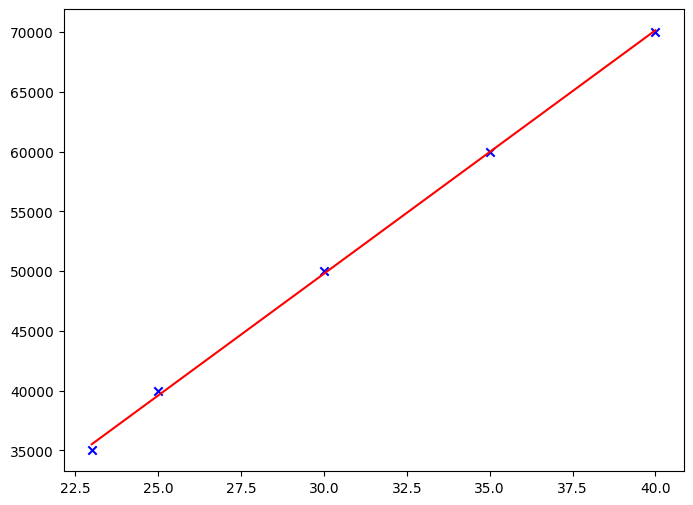

In [53]:
y_pred = b_0 + b_1*x
plt.figure(figsize=(8,6))
plt.scatter(data=data, x='age', y='income', marker='x',color='blue')


plt.plot(x, y_pred, color='red')